<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Loan Prediction  <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as sma
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings
from sklearn.metrics import r2_score, mean_squared_error
filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,log_loss,roc_auc_score,precision_score,classification_report,plot_roc_curve,roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report

# Table of Content

* **[Understanding the data](#Understanding_the_data)**
* **[Data Understanding](#data_und)**
* **[DataType Conversions](#datatype_conversions)**
* **[Univariate Analysis](#univariate)**
* **[Base Model on Raw Numerical Data](#Raw_Numerical_Base_Model)**
* **[Imputations - Train Data](#imputations_train)**
* **[Imputations - Test Data](#imputations_test)**
* **[Missing Values](#missing_values)**
* **[Feature Encoding](#fea_encode)**
* **[Train Test Split](#train_test_split)**
* **[Base Model](#base_model)**
* **[Model Improvement](#model_improvement)**

<a id="Understanding_the_data"> </a>
## `Understanding the data`

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.shape

(614, 13)

#### `Target Variable Percentage:`

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


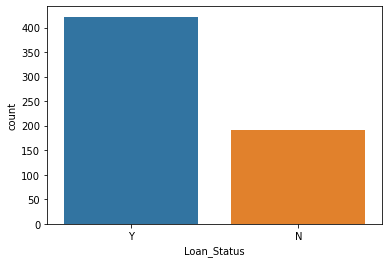

In [6]:
print(train['Loan_Status'].value_counts(normalize=True))
sns.countplot(train['Loan_Status'])
plt.show()

#Not Imbalanced

<a id="datatype_conversions"> </a>
### `Data-Type Conversions`

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
#Since credit_history is a binary variable, converting it to object

train['Credit_History'] = train['Credit_History'].astype('object')

In [10]:
train.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP002892,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


`Inference:`
* Here Loan_ID is not significant to be included in the model building

#### `Duplicates:`

In [11]:
train.duplicated().any()

False

<a id="univariate"> </a>
### `Univariate Analysis`

#### `Categorical Features`

In [12]:
train.select_dtypes(include='object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

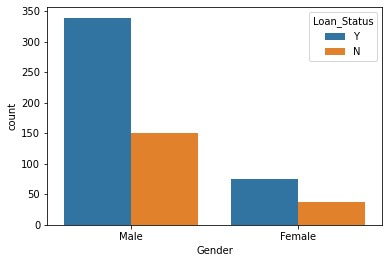

In [13]:
#Gender

sns.countplot(train['Gender'], hue=train['Loan_Status'])
plt.show()

`Inference:`
* No Overall difference is seen in the population who got the loan as to the total population of that gennder
* Meaning that this feature is not that important as where Most males got the loan similiary most of the females out of all got the loan.

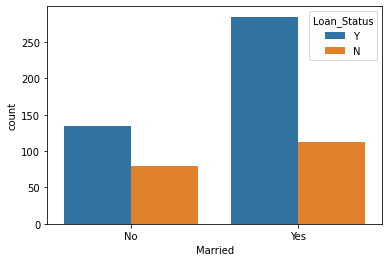

In [14]:
#Married

sns.countplot(train['Married'], hue=train['Loan_Status'])
plt.show()

`Inference:`
* Chances are higher for the loan to be allocated if the applie is married.
* Good Feature

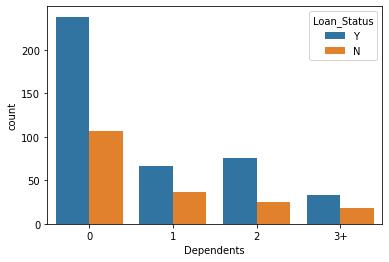

In [15]:
#Dependents

sns.countplot(train['Dependents'], hue=train['Loan_Status'])
plt.show()

`Inference:`
* The class with 0 dependents have the highest probability of getting a loan compared to other classes where the probability is almost similiar
* Good Feature

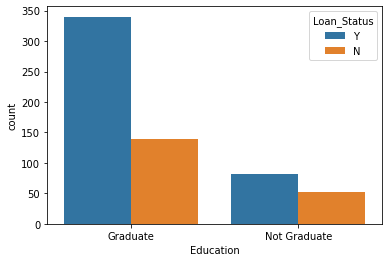

In [16]:
#Education

sns.countplot(train['Education'], hue=train['Loan_Status'])
plt.show()

`Inference:`
* Graduates have a higher probaility of getting the loan approved whereas the probability isn't that low in case of Not Graduate.
* Not an important feature

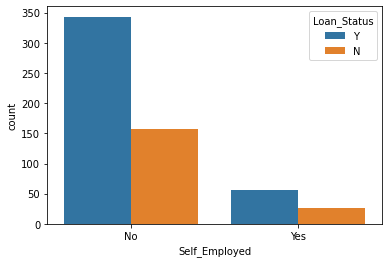

In [17]:
#Self_Employed

sns.countplot(train['Self_Employed'], hue=train['Loan_Status'])
plt.show()

`Inference:`
* No Pattern (Same as above)
* Not an Important Feature

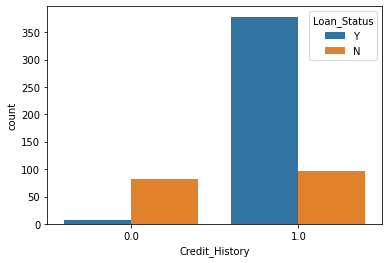

In [18]:
#Credit History

sns.countplot(train['Credit_History'], hue=train['Loan_Status'])
plt.show()

`Inference:`
* Those with credit_history have been given a preference for loan i.e. credit_history = 1.0
* Hence this becomes an important feature as the loan is provided to those with credit_history

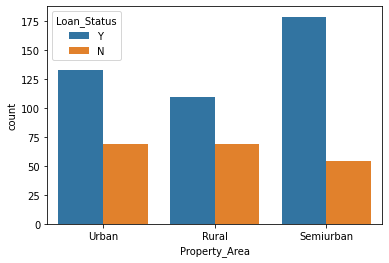

In [19]:
#Property_Area

sns.countplot(train['Property_Area'], hue=train['Loan_Status'])
plt.show()

`Inference:`
* Semi-Urban Property Area has more than 50% chance to get a loan
* Good Feature

### `Preperaing data without any imputation`

In [20]:
import random

In [21]:
submit_v1 = pd.DataFrame({'Loan_ID':test.Loan_ID.iloc[:367],
                          'Loan_Status':random.choices(train['Loan_Status'], k=367)})

submit_v1.to_csv('submit_v1.csv', index=False)

<a id="Raw_Numerical_Base_Model"> </a>
## `Base Model on Raw Numerical Data`

`Inference:`
* Since the data contains null values hence model on raw data is not possible

In [22]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<a id="imputations_train"> </a>
## `Imputations - Train`

In [23]:
significant_train = train.copy()
significant_train.drop('Loan_ID', axis=1, inplace=True)

<a id="missing_values"> </a>
### `Missing Values:`

In [24]:
missing = (significant_train.isnull().sum()/len(significant_train))*100
missing.sort_values(ascending=False)

Credit_History       8.143322
Self_Employed        5.211726
LoanAmount           3.583062
Dependents           2.442997
Loan_Amount_Term     2.280130
Gender               2.117264
Married              0.488599
Loan_Status          0.000000
Property_Area        0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
dtype: float64

`Inference:`
* Eventhough the data contains less than 10% missing values from the total, the dataset is soo small that the null values cannot be directly dropped here. Hence imputing them.

In [25]:
num_df = significant_train.select_dtypes(include='number')
cat_df = significant_train.select_dtypes(include='object')

#### `Checking Numerical Columns Imputation for Mean/Mode/Median`

In [26]:
num_df.isnull().sum()/len(num_df)*100

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
dtype: float64

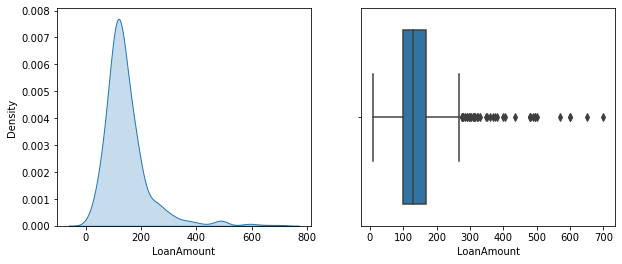

2.677551679256059

In [27]:
#Loan Amount

fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.kdeplot(data=num_df['LoanAmount'], shade=True, ax=ax[0])
sns.boxplot(num_df['LoanAmount'], ax=ax[1])

plt.show()

num_df['LoanAmount'].skew()

#Highly Right Skewed hence it can be imputed using Median

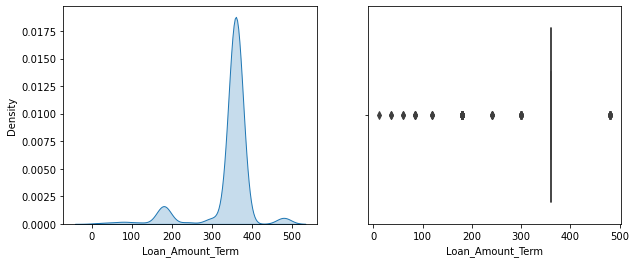

-2.362414124216269

In [28]:
#Loan_Amount_Term

fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.kdeplot(data=num_df['Loan_Amount_Term'], shade=True, ax=ax[0])
sns.boxplot(num_df['Loan_Amount_Term'], ax=ax[1])

plt.show()

num_df['Loan_Amount_Term'].skew()

#Highly Negatively Skewed hence can be imputed using median

In [29]:
#Imputations

num_df['LoanAmount'] = num_df['LoanAmount'].fillna(num_df['LoanAmount'].median())
num_df['Loan_Amount_Term'] = num_df['Loan_Amount_Term'].fillna(num_df['Loan_Amount_Term'].median())

#Verifying Once Again
num_df.isnull().sum()/len(num_df)*100

ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
dtype: float64

#### `Categorical Columns Imputation`

In [30]:
(cat_df.isnull().sum()/len(cat_df)*100).sort_values(ascending=False)

Credit_History    8.143322
Self_Employed     5.211726
Dependents        2.442997
Gender            2.117264
Married           0.488599
Loan_Status       0.000000
Property_Area     0.000000
Education         0.000000
dtype: float64

In [31]:
#Feature Engineering on the Target column

target_values = {'Y': 1 , 'N' : 0}
target = cat_df['Loan_Status']
target = target.map(target_values)

cat_df.drop('Loan_Status', axis=1, inplace=True)

In [32]:
target.dtype

dtype('int64')

In [33]:
#Imputing Cat Columns with their Mode

cat_df = cat_df.apply(lambda x : x.fillna(x.mode()[0]))

#Verifying
(cat_df.isnull().sum()/len(cat_df)*100).sort_values(ascending=False)

Property_Area     0.0
Credit_History    0.0
Self_Employed     0.0
Education         0.0
Dependents        0.0
Married           0.0
Gender            0.0
dtype: float64

<a id="fea_encode"> </a>
### `Categorical Feature Encoding`

In [34]:
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,No,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1.0,Urban
4,Male,No,0,Graduate,No,1.0,Urban


In [35]:
cat_df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [36]:
cat_df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le = LabelEncoder()

for i in cat_df.columns:
    cat_df[i] = le.fit_transform(cat_df[i])

In [39]:
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [40]:
del significant_train

#### `Merging the Imputations on Numerical and Categorical Columns`

In [41]:
significant_train = pd.concat([num_df, cat_df], axis=1)
significant_train.shape

(614, 11)

In [42]:
significant_train.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,5849,0.0,128.0,360.0,1,0,0,0,0,1,2
1,4583,1508.0,128.0,360.0,1,1,1,0,0,1,0


<a id="imputations_test"> </a>
## `Imputations - Test`

In [43]:
#Since credit_history is a binary variable, converting it to object

test['Credit_History'] = test['Credit_History'].astype('object')

In [44]:
significant_test = test.copy()
significant_test.drop('Loan_ID', axis=1, inplace=True)

<a id="missing_values"> </a>
### `Missing Values:`

In [45]:
missing = (significant_test.isnull().sum()/len(significant_test))*100
missing.sort_values(ascending=False)

Credit_History       7.901907
Self_Employed        6.267030
Gender               2.997275
Dependents           2.724796
Loan_Amount_Term     1.634877
LoanAmount           1.362398
Property_Area        0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
Married              0.000000
dtype: float64

`Inference:`
* Eventhough the data contains less than 10% missing values from the total, the dataset is soo small that the null values cannot be directly dropped here. Hence imputing them.

In [46]:
num_df = significant_test.select_dtypes(include='number')
cat_df = significant_test.select_dtypes(include='object')

#### `Checking Numerical Columns Imputation for Mean/Mode/Median`

In [47]:
num_df.isnull().sum()/len(num_df)*100

ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
dtype: float64

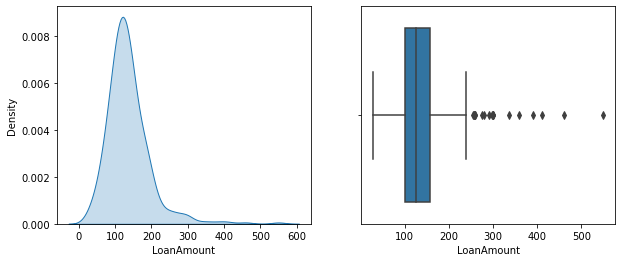

2.223512207498288

In [48]:
#Loan Amount

fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.kdeplot(data=num_df['LoanAmount'], shade=True, ax=ax[0])
sns.boxplot(num_df['LoanAmount'], ax=ax[1])

plt.show()

num_df['LoanAmount'].skew()

#Highly Right Skewed hence it can be imputed using Median

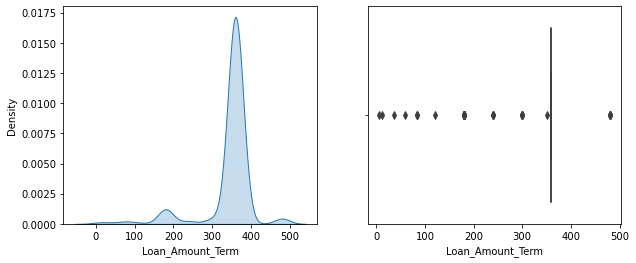

-2.679317770196837

In [49]:
#Loan_Amount_Term

fig, ax = plt.subplots(1, 2, figsize=(10,4))

sns.kdeplot(data=num_df['Loan_Amount_Term'], shade=True, ax=ax[0])
sns.boxplot(num_df['Loan_Amount_Term'], ax=ax[1])

plt.show()

num_df['Loan_Amount_Term'].skew()

#Highly Negatively Skewed hence can be imputed using median

In [50]:
#Imputations

num_df['LoanAmount'] = num_df['LoanAmount'].fillna(num_df['LoanAmount'].median())
num_df['Loan_Amount_Term'] = num_df['Loan_Amount_Term'].fillna(num_df['Loan_Amount_Term'].median())

#Verifying Once Again
num_df.isnull().sum()/len(num_df)*100

ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
dtype: float64

#### `Categorical Columns Imputation`

In [51]:
(cat_df.isnull().sum()/len(cat_df)*100).sort_values(ascending=False)

Credit_History    7.901907
Self_Employed     6.267030
Gender            2.997275
Dependents        2.724796
Property_Area     0.000000
Education         0.000000
Married           0.000000
dtype: float64

In [52]:
#Imputing Cat Columns with their Mode

cat_df = cat_df.apply(lambda x : x.fillna(x.mode()[0]))

#Verifying
(cat_df.isnull().sum()/len(cat_df)*100).sort_values(ascending=False)

Property_Area     0.0
Credit_History    0.0
Self_Employed     0.0
Education         0.0
Dependents        0.0
Married           0.0
Gender            0.0
dtype: float64

<a id="fea_encode"> </a>
### `Categorical Feature Encoding`

In [53]:
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,1.0,Urban
1,Male,Yes,1,Graduate,No,1.0,Urban
2,Male,Yes,2,Graduate,No,1.0,Urban
3,Male,Yes,2,Graduate,No,1.0,Urban
4,Male,No,0,Not Graduate,No,1.0,Urban


In [54]:
cat_df['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [55]:
cat_df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

for i in cat_df.columns:
    cat_df[i] = le.fit_transform(cat_df[i])

In [58]:
cat_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,1,0,0,0,1,2
1,1,1,1,0,0,1,2
2,1,1,2,0,0,1,2
3,1,1,2,0,0,1,2
4,1,0,0,1,0,1,2


In [59]:
del significant_test

#### `Merging the Imputations on Numerical and Categorical Columns`

In [60]:
significant_test = pd.concat([num_df, cat_df], axis=1)
significant_test.shape

(367, 11)

In [61]:
significant_test.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,5720,0,110.0,360.0,1,1,0,0,0,1,2
1,3076,1500,126.0,360.0,1,1,1,0,0,1,2


<a id="train_test_split"> </a>
## `Train-Test Split`

In [172]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [154]:
#train-test split

x_train_tts, x_test_tts, y_train_tts, y_test_tts = train_test_split(significant_train, target, test_size=0.2, random_state=42)

print('\nratio of target in y_train :',y_train_tts.value_counts().values/ len(y_train_tts))
print('ratio of target in y_test :',y_test_tts.value_counts().values/ len(y_test_tts))
print('ratio of target in original_data :',train['Loan_Status'].value_counts().values/ len(train))


ratio of target in y_train : [0.69653768 0.30346232]
ratio of target in y_test : [0.6504065 0.3495935]
ratio of target in original_data : [0.68729642 0.31270358]


In [173]:
#StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_sss, test_sss in sss.split(significant_train, target):
    x_train_sss, x_test_sss = significant_train.iloc[train_sss], significant_train.iloc[test_sss]
    y_train_sss, y_test_sss = target.iloc[train_sss], target.iloc[test_sss]
    
print('\nratio of target in y_train :',y_train_sss.value_counts().values/ len(y_train_sss))
print('ratio of target in y_test :',y_test_sss.value_counts().values/ len(y_test_sss))
print('ratio of target in original_data :',train['Loan_Status'].value_counts().values/ len(train))


ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]


`Inference:`
* Since the `StratifiedShuffleSplit` is able to maintain the ratio of the target variable even after the split hence proceeding with `StratifiedShuffleSplit` instead of `traintestsplit`

In [174]:
x_train = x_train_sss.copy()
x_test  = x_test_sss.copy()
y_train = y_train_sss.copy()
y_test  = y_test_sss.copy()

#Verifying the new x and y train test split
print('\nratio of target in y_train :',y_train.value_counts().values/ len(y_train))
print('ratio of target in y_test :',y_test.value_counts().values/ len(y_test))
print('ratio of target in original_data :',train['Loan_Status'].value_counts().values/ len(train))
print()
print('X_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', x_test.shape)
print('y_test shape', y_test.shape)


ratio of target in y_train : [0.68635438 0.31364562]
ratio of target in y_test : [0.69105691 0.30894309]
ratio of target in original_data : [0.68729642 0.31270358]

X_train shape (491, 11)
y_train shape (491,)
X_test shape (123, 11)
y_test shape (123,)


<a id="base_model"> </a>
## `Base Model`

In [175]:
import statsmodels.api as sma
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, log_loss, accuracy_score

In [176]:
logreg = sma.Logit(y_train, x_train).fit()
print(logreg.summary())

#Output Minimised

Optimization terminated successfully.
         Current function value: 0.492025
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  491
Model:                          Logit   Df Residuals:                      480
Method:                           MLE   Df Model:                           10
Date:                Wed, 08 Dec 2021   Pseudo R-squ.:                  0.2089
Time:                        22:39:35   Log-Likelihood:                -241.58
converged:                       True   LL-Null:                       -305.40
Covariance Type:            nonrobust   LLR p-value:                 1.426e-22
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
ApplicantIncome   -9.322e-06    2.5e-05     -0.373      0.709   -5.83e-05    3.97e-05
Coapplic

In [177]:
y_pred_prob_logreg = logreg.predict(x_test)

ypred_logreg = [0 if x<0.5 else 1 for x in y_pred_prob_logreg]

In [178]:
#Confusion Metrics
cm = confusion_matrix(y_test, ypred_logreg)

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

print(classification_report(y_test, ypred_logreg))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



#### `Inference:`
    
* ~86% of the predictions out of all are correct
* Out of the total predicted, 96% of class `0` and 84% of class `1` were correctly predicted.
* Out of the actual positives that were to be predicted, 58% of class `0` and 99% of class `1` were correctly predicted.

### `Base Model Submission`

In [161]:
ypred_prob_logreg_test = logreg.predict(significant_test)

ypred_logreg_test = [0 if x<0.5 else 1 for x in ypred_prob_logreg_test]

In [162]:
submit_v7 = pd.DataFrame({'Loan_ID':test.Loan_ID.iloc[:],
                          'Loan_Status':ypred_logreg_test})


target_values = {1: 'Y' , 0 : 'N'}
submit_v7['Loan_Status'] = submit_v7['Loan_Status'].map(target_values)

In [163]:
submit_v7.to_csv('submit_v7.csv', index=False)

## `Model Improvement`

<a id="model_improvement"> </a>
### `Feature Engineering`

<AxesSubplot:>

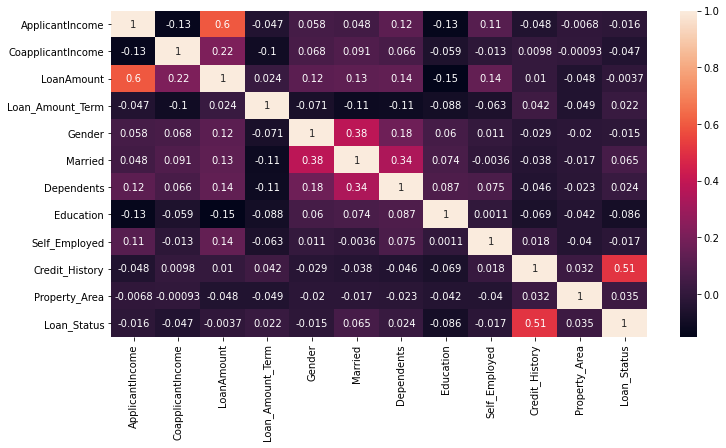

In [164]:
plt.figure(figsize=(12,6))
sns.heatmap(pd.concat([x_train, y_train], axis=1).corr(), annot=True)

#### `Inference:`
    
* Loan_Amount and Applicant_Income are correlated here.
* As per domain knowledge, applicant_income will be correlated with co-applicant income as well and loan_amount will be correlated with the loan_amount_term in predicting the loan to be granted or not.
* Let's check if our model improves or decreases by reducing these features.

In [179]:
significant_fe_train = significant_train.copy()
significant_fe_train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1, inplace=True)

#### `Feature Engineered Model`

In [180]:
from sklearn.linear_model import LogisticRegression

##### `Splitting in Train and Test`

In [185]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_sss, test_sss in sss.split(significant_fe_train, target):
    x_train_fe, x_test_fe = significant_fe_train.iloc[train_sss], significant_fe_train.iloc[test_sss]
    y_train_fe, y_test_fe = target.iloc[train_sss], target.iloc[test_sss]

In [186]:
print('X_train shape', x_train_fe.shape)
print('y_train shape', y_train_fe.shape)
print('X_test shape', x_test_fe.shape)
print('y_test shape', y_test_fe.shape)

X_train shape (491, 7)
y_train shape (491,)
X_test shape (123, 7)
y_test shape (123,)


In [187]:
logreg_fe = LogisticRegression(random_state=42)
logreg_femodel = logreg_fe.fit(x_train_fe, y_train_fe)

In [189]:
ypred_prob_logreg_fe = logreg_femodel.predict(x_test_fe)

ypred_logreg_fe = [0 if x<0.5 else 1 for x in ypred_prob_logreg_fe]

In [190]:
#Confusion Metrics
cm = confusion_matrix(y_test_fe, ypred_logreg_fe)

print(classification_report(y_test, ypred_logreg))
print()
print(classification_report(y_test_fe, ypred_logreg_fe))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123


              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



`Inference`:
    
* Since a scenario where customer is not allocated any loan but our model predicts that the customer has an ongoing loan is a dangerous scanerio for this dataset hence our main focus is to get a better precision than recall here.
* As the false positive decrease, precision will start increasing.
* Dropping those 4 features has just 1% effect in the overall precision proportion stating that the removed features did not contribute that much to the model.
* Moving on to further model to improve precision score

### `Feature Engineered Model Submission`

In [193]:
significantfe_test = significant_test.copy()
significantfe_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1, inplace=True)

In [194]:
ypred_prob_logregfe_test = logreg_femodel.predict(significantfe_test)

ypred_logregfe_test = [0 if x<0.5 else 1 for x in ypred_prob_logregfe_test]

In [195]:
submit_v8 = pd.DataFrame({'Loan_ID':test.Loan_ID.iloc[:],
                          'Loan_Status':ypred_logreg_test})


target_values = {1: 'Y' , 0 : 'N'}
submit_v8['Loan_Status'] = submit_v8['Loan_Status'].map(target_values)

In [196]:
submit_v8.to_csv('submit_v8.csv', index=False)

In [223]:
def getaccuracy(model, x_train, x_test, y_train, y_test):
    print('-'*10,end='')
    print('Train Accuracy',end='')
    print('-'*10)
    ypred_train = model.predict(x_train)
    print(accuracy_score(y_train, ypred_train))
    
    print('-'*10,end='')
    print('Test Accuracy',end='') 
    print('-'*10)
    ypred_test = model.predict(x_test)
    print(accuracy_score(y_test, ypred_test))

### `Decision Tree Classifier`

In [198]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
dtc = DecisionTreeClassifier(criterion='gini', 
                             splitter='best', 
                             max_depth=5
                            )

In [204]:
dtc_model = dtc.fit(x_train, y_train)

In [205]:
ypred_dtc = dtc_model.predict(x_test)

#### `FE Decision Tree`

In [207]:
dtc_fe = DecisionTreeClassifier(criterion='gini', 
                             splitter='best', 
                             max_depth=5
                            )

In [208]:
dtc_fe_model = dtc_fe.fit(x_train_fe, y_train_fe)

In [209]:
ypred_dtc_fe = dtc_fe_model.predict(x_test_fe)

In [224]:
getaccuracy(dtc, x_train, x_test, y_train, y_test)

----------Train Accuracy----------
0.824847250509165
----------Test Accuracy----------
0.8211382113821138


In [225]:
getaccuracy(dtc_fe, x_train_fe, x_test_fe, y_train_fe, y_test_fe)

----------Train Accuracy----------
0.8044806517311609
----------Test Accuracy----------
0.8536585365853658


In [211]:
#Confusion Metrics
print('Without Feature Engineering')
print(classification_report(y_test, ypred_dtc))
print()
print('Feature Engineered')
print(classification_report(y_test_fe, ypred_dtc_fe))

Without Feature Engineering
              precision    recall  f1-score   support

           0       0.81      0.55      0.66        38
           1       0.82      0.94      0.88        85

    accuracy                           0.82       123
   macro avg       0.82      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123


Feature Engineered
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



`Inference`:
    
* Though feature engineered modelling is giving a good precision, the model is not a good fit.
* Performing other imputation of data before moving on with Random Forest

### `Decision Tree Model Submission`

In [233]:
ypred_dtc_test = dtc.predict(significant_test)

submit_v9 = pd.DataFrame({'Loan_ID':test.Loan_ID.iloc[:],
                          'Loan_Status':ypred_dtc_test})

In [234]:
target_values = {1: 'Y' , 0 : 'N'}
submit_v9['Loan_Status'] = submit_v9['Loan_Status'].map(target_values)

submit_v9.to_csv('submit_v9.csv', index=False)

#### `Outliers`

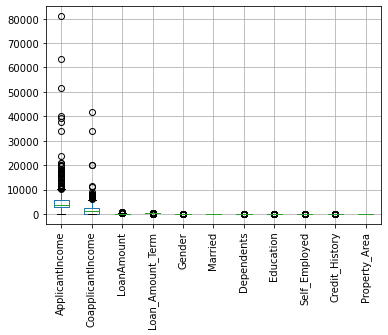

In [248]:
significant_train.boxplot()
plt.xticks(rotation=90)
plt.show()

In [245]:
q1 = significant_train.quantile(0.25)
q3 = significant_train.quantile(0.75)

iqr = q3-q1

ll = q1-1.5*iqr
ul = q3+1.5*iqr

significant_train[~((significant_train<ll) | (significant_train>ul)).any(axis=1)]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,5849,0.0,128.0,360.0,1,0,0,0,0,1,2
1,4583,1508.0,128.0,360.0,1,1,1,0,0,1,0
4,6000,0.0,141.0,360.0,1,0,0,0,0,1,2
8,4006,1526.0,168.0,360.0,1,1,2,0,0,1,2
10,3200,700.0,70.0,360.0,1,1,2,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
603,3676,4301.0,172.0,360.0,1,0,0,0,0,1,0
606,3400,2500.0,173.0,360.0,1,1,1,0,0,1,1
608,3232,1950.0,108.0,360.0,1,1,0,0,0,1,0
611,8072,240.0,253.0,360.0,1,1,1,0,0,1,2


`Inference`:
    
* As removing outliers is indireclty removing most of the dataset hence as mentioned earlier, outliers here must not be imputed.
* Also another reason is if a person has higher income, his own chances of getting a loan increases, hence such outliers cannot be removed from the dataset.

### `Random Forest Classifier`

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=5,
                             criterion='entropy',
                             min_samples_leaf= 1,
                             min_samples_split=2
                            )

In [251]:
rfc_model = rfc.fit(x_train, y_train)

In [252]:
ypred_rfc = rfc_model.predict(x_test)

### `Random Forest Classifier Model Submission`

In [254]:
ypred_rfc_test = rfc.predict(significant_test)

submit_v10 = pd.DataFrame({'Loan_ID':test.Loan_ID.iloc[:],
                          'Loan_Status':ypred_rfc_test})

In [255]:
target_values = {1: 'Y' , 0 : 'N'}
submit_v10['Loan_Status'] = submit_v10['Loan_Status'].map(target_values)

submit_v10.to_csv('submit_v10.csv', index=False)